# Maximum Likelihood Estimation (MLE)
# --------------------------------
Maximum Likelihood Estimation (MLE) is a method used to estimate the parameters of a statistical model. It seeks to find the values that maximize the likelihood function, which measures how well the model explains the observed data.

Let's consider a simple example: flipping a coin. Assume you have a biased coin, and you want to estimate the probability of getting heads (H). Your model parameter is the probability of heads, denoted as "p."

1. **Define the Likelihood Function:**
   The likelihood function is the probability of observing your data given the parameter. For a coin flip, it follows a Bernoulli distribution. The likelihood function is then: 

    $$L(p) = p^k * (1-p)^{n-k} $$

   where \(k\) is the number of heads observed, \(n\) is the total number of coin flips.

2. **Maximize the Likelihood:**
   Take the logarithm of the likelihood function (log-likelihood) for easier calculations:

   $$ \log L(p) = k \log(p) + (n-k) \log(1-p) $$

   To find the MLE, differentiate the log-likelihood with respect to \(p\), set it to zero, and solve for \(p\).

3. **Example:**
   Suppose you flip the coin 10 times and observe 7 heads (\(k=7\)). The likelihood function becomes:

   $$ L(p) = p^7 * (1-p)^3 $$

   Taking the log-likelihood:

   $$ \log L(p) = 7 \log(p) + 3 \log(1-p) $$

   Differentiate and set to zero:

   $$ \frac{d}{dp} \log L(p) = \frac{7}{p} - \frac{3}{1-p} = 0 $$

   Solving this equation will give you the MLE for \(p\).

In this way, MLE helps find the parameter value (probability of heads in this case) that maximizes the likelihood of observing the given data (7 heads in 10 coin flips).

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize

# Generate synthetic data with known parameters
np.random.seed(42)
true_mean = 5
true_std = 2
data = np.random.normal(true_mean, true_std, 100)

# Create a DataFrame
df = pd.DataFrame({'Observations': data})

df.head()

,Observations
0,5.993428
1,4.723471
2,6.295377
3,8.046060
4,4.531693


In [2]:
# Likelihood function for Gaussian distribution
def likelihood(params, data):
    mu, sigma = params
    ll = np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return -ll  # Negative log-likelihood for minimization

# Initial guess for parameters
initial_params = [0, 1]

# Use scipy's minimize function to find MLE
result = minimize(likelihood, initial_params, args=(df['Observations'],), method='L-BFGS-B')

# Extract MLE estimates
estimated_mean, estimated_std = result.x

# Print results
print(f"True Mean: {true_mean}, True Std: {true_std}")
print(f"Estimated Mean: {estimated_mean:.4f}, Estimated Std: {estimated_std:.4f}")


True Mean: 5, True Std: 2
Estimated Mean: 5.4479, Estimated Std: 2.3411


## Example-2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate synthetic data for linear regression
np.random.seed(42)

true_slope = 2
true_intercept = 5

x = np.linspace(0, 10, 100)
y_true = true_slope * x + true_intercept

noise = np.random.normal(0, 2, size=len(x))

y_observed = y_true + noise

# Create a DataFrame
df = pd.DataFrame({'X': x, 'Y': y_observed})
df.head()

,X,Y
0,0.00000,5.993428
1,0.10101,4.925492
2,0.20202,6.699417
3,0.30303,8.652120
4,0.40404,5.339774


**Log-liklihood:** It is defined as:

$\text{Log-liklihood} = -\frac{1}{2} \sum_{i=1}^n \left(\frac{(y_i - (m x_i +b))^2}{\sigma^2} +\text{log}(2 \pi \sigma^2)\right)$

where:
- `n` is the number of observations.
- $y_i$   is the observed response for the i-th observation, and 
- $x_i$ is the corresponding predictor variable for the i-th observations
- m is the slope of regression line 
- b  is the intercept of the regression line
- $\sigma$ is the standard deviation of the normally distributed errors.

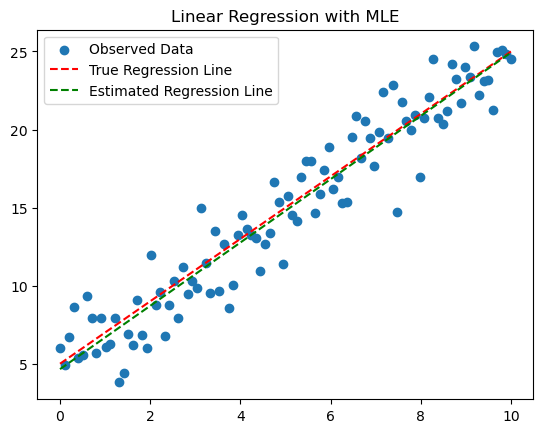

True Slope: 2, True Intercept: 5
Estimated Slope: 2.0276, Estimated Intercept: 4.6544, Estimated Noise Sigma: 1.8054


In [4]:
# Define the likelihood function for linear regression
def linear_regression_likelihood(params, data):
    slope, intercept, sigma = params
    y_pred = slope * data['X'] + intercept
    residuals = data['Y'] - y_pred
    ll = -0.5 * np.sum((residuals / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))
    return -ll  # Negative log-likelihood for minimization

# Initial guess for parameters
initial_params = [1, 1, 1]

# Use scipy's minimize function to find MLE for linear regression
result = minimize(linear_regression_likelihood, initial_params, args=(df,), method='L-BFGS-B')

# Extract MLE estimates
estimated_slope, estimated_intercept, estimated_sigma = result.x

# Plot the results
plt.scatter(df['X'], df['Y'], label='Observed Data')
plt.plot(x, y_true, label='True Regression Line', color='red', linestyle='--')
plt.plot(x, estimated_slope * x + estimated_intercept, label='Estimated Regression Line', color='green', linestyle='--')
plt.legend()
plt.title('Linear Regression with MLE')
plt.show()

# Print results
print(f"True Slope: {true_slope}, True Intercept: {true_intercept}")
print(f"Estimated Slope: {estimated_slope:.4f}, Estimated Intercept: {estimated_intercept:.4f}, Estimated Noise Sigma: {estimated_sigma:.4f}")

Intercept: 1.4302
Slope: 1.9080


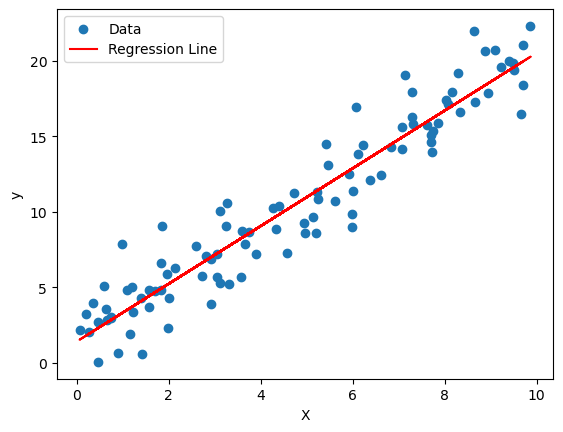

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# Create a DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

# Add a constant term for the intercept
X_with_intercept = sm.add_constant(X)

# Fit the linear regression model using Maximum Likelihood Estimation
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Get the MLE estimated coefficients
intercept, slope = results.params

# Print the results
print(f'Intercept: {intercept:.4f}')
print(f'Slope: {slope:.4f}')

# Plot the data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X, intercept + slope * X, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
